# Regresión lineal

La regresión lineal es un método de aprendizaje supervisado, donde dado un elemento de entrada $x \in \mathbb{R}^d$ se busca aprender una función $f(x; w) \in \mathbb{R}$ que estime valores reales para cada entrada $x$. Como su nombre lo dice, esta estimación la hace de manera lineal. Es decir, estima una recta, una función lineal. De tal forma que $f: X \to Y$ es lineal. Si los datos tienen una correlación lineal alta, la regresión lineal será un buen aproximador de estos valores. Podemos ver también al valor $f(x;w)$ como el valor esperado para $x$.

A continuación presentamos un ejemplo simple de regresión lineal con datos de la paquetería <tt>sklearn</tt> que describen casas y sus precios. El objetivo es estimar la función que dada las características de una casa regrese un precio estimado.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd

### Preparación de los datos

Realizaremos una regresión lineal sobre datos de ''Boston house prices'' que se encuentran disponibles a partir de la paquetería de <tt>sklearn</tt>. En este caso, el dataset está conformado por vectores  en $\mathbb{R}^{13}$ asociados a un valor en $\mathbb{R}$. 

Cada dimensión del vector de entrada $x$ representa una variable que describe a la casa en cuestión; algunas de las variables son el crimen per capita, edad/años de la casa, etc. Estas varibles pueden revisarse a partir de la misma paquetería.

En primer lugar, cargamos el dataset. Para visualizar mejor el dataset, utilizamos la paquetería <tt>pandas</tt>, la cual nos permitirá visualizar datos tabulares de manera eficiente, así como realizar cálculos y estadísticas sobre estos datos.

In [2]:
#Carga dataset
data = load_boston()
#Visualiza variables
print(data.feature_names)

#Formato de pandas
table_data = pd.DataFrame(data.data, columns=data.feature_names)
#Agregamos la clase a la tabla
table_data['Y'] = data.target

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


La misma paquetería <tt>sklearn</tt> nos proporciona información sobre el dataset. Con el comando <tt>.DESCR</tt> podemos visualizar esta información. Nos muestra el número de instancias/datos que contiene el dataset. Asimismo, despliega la descripción de las variables en los vectores. Asimismo, proporciona otra información relevante para el dataset.

In [3]:
#Información del dataset
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Estadísticas y visualización de los datos

Una parte importante del aprendizaje automático es su relación con el análisis estadístico. Por tanto, antes de pasar a aplicar el algoritmo para estimación de la regresión lineal podemos computar algunas estadísticas. Una de la más importantes en este caso, en tanto modelo lineal, es la correlación lineal.
Con la tabla de pandas que hemos creado, podemos definir una correlación entre las variables. Ya que buscamos establecer una regresión lineal, los elementos que muestren una mayor correlación con la variable $Y$ (precio) serán los que nos servirán mejor.  

La correlación de Pearson (lineal) se estima de la siguiente forma:

$$\rho(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

Donde $Cov(X,Y)$ es la covarianza entre las variables $X$ e $Y$, la cuál se cálcula como $Cov(X,Y) = \mathbb{E}\big[ (X-\mu_x)(Y-\mu_y) \big]$ donde $\mu_i$ son las medias de las variables correspondientes. Asimismo, $\sigma_i$ es la desviación estandar de las variables.

In [4]:
#Correlaciones lineales
table_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Como podemos observar, la variable $RM$ (número promedio de cuartos) muestra una correlación positiva alta con la variable de salida $Y$; por tanto, puede servirnos para realizar la correlación lineal. Tomaremos, entonces, esta variable como nuestra variable de entrada. Podemos visualizar entonces esta variable con respecto a la salida $Y$ para observar la correlación.

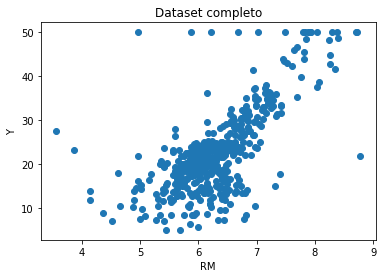

In [5]:
#Valores de X para RM
X_RM = table_data[['RM']].to_numpy()
#Valores de salida Y
Y = data.target

#Visualización
plt.scatter(X_RM, Y)
plt.title('Dataset completo')
plt.ylabel('Y')
plt.xlabel('RM')
plt.show()

#### Separación de los datos

Una parte importante en toda metodología de aprendizaje automático es la separación de los datos en entrenamiento y evaluación (otras veces también se usa evaluación, pero no es el caso). El esquema que usamos para separación de datos es 70-30; es decir, tomamos 70\% para entrenamiento y 30\% para evaluación. 

Usamos la función <tt>train_test_split</tt> de la paquetería <tt>sklearn</tt> que separa los datos aleatoriamente. Hacer la separación de manera aleatoria es importante, pues si los datos están ordenados bajo ciertos criterios, estos criterios pueden introducir sesgos en nuestro aprendizaje.

In [6]:
#Separación de los datos
X_train, X_test, Y_train, Y_test = train_test_split(X_RM,Y, test_size=0.3)
#Número de datos
print('Datos de entrenamiento: {}\nDatos de evaluación: {}'.format(len(X_train), len(X_test)))

Datos de entrenamiento: 354
Datos de evaluación: 152


Hasta ahora estamos considerando regresión lineal unidimensional. La entrada es un real, por lo que podemos visalizarlo. Visualizamos tanto los datos de entrenamiento como los de evaluación.

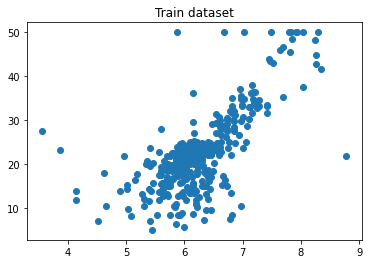

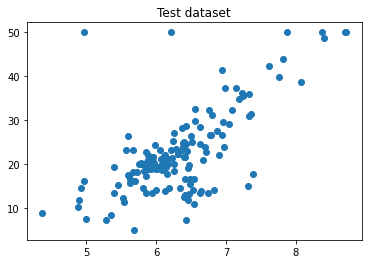

In [7]:
#Visualización datos de entrenamiento
plt.scatter(X_train,Y_train)
plt.title('Train dataset')
plt.show()

#Visualización datos de evaluación
plt.scatter(X_test,Y_test)
plt.title('Test dataset')
plt.show()

## Regresión lineal

La regresión lineal, como ya lo señalamos, es un modelo de aprendizaje supervisado lineal que estima una función lineal $f: \mathbb{R}^d \to \mathbb{R}$ debe ajustar los datos de entrenamiento, de tal forma que pueda predecir datos nuevo. El modelo de regresión lineal se divide en los siguientes módulos:

1. <b>Predicción:</b> El modelo de regresión lineal estima un valor real a partir de un elemento de entrada $x$ a partir de la función lineal: $$f(x) = \sum_{i=1}^d  w_i x_i + b= wx+b$$ De tal forma que podemos ver los parámetros a aprender como un vector $w \in \mathbb{R}^d$. El valor $b$ conocido como bias o sesgo es un valor de traslación para que la recta o hiperplano que ajusta los datos no siempre sea centrada en el 0. 
2. <b>Aprendizaje:</b> El aprendizaje se determina como un problema de optimización. En tanto que lo que buscamos es que $f(x)$ sea lo más cercano a $y$, la función de riesgo/objetivo que definimos es un error cuadrático: $$R(w) = \frac{1}{2} ||f(X) - Y||^2$$ El mínimo de esta función se puede estimar obteniendo la derivada de la función e igualando a cero. La derivada de la función está dada por:
\begin{align}
    \nabla_w R(w) &= (f(X) - Y)X \\
                  &= (Xw - Y)X \\
                  &= X^TXw-X^TY
\end{align}
De aquí que, cuando $\nabla_w R(w) = 0$, entonces: $$w = (X^T X)^{-1}X^TY$$  \textbf{Nota}: Para simplificar el método, agreamos una columna con 1's a los datos de entrada, de tal forma que $x' = [x;1]$. este 1 servirá para representar el bias, de tal forma que la función $f(x) = wx'$; es decir, el bias será una entrada (la última) del vector w.

La clase que definimos incorpora estas funciones: predicción (<tt>predict</tt>) y aprendizaje (<tt>fit</tt>).

In [8]:
class LinearRegression(object):
    """Clase del modelo de regresión lineal"""
    def __init__(self):
        #Parámetros
        w = None
        b = None
        
    def predict(self, x):
        """Predicción del modelo"""
        f = np.dot(x,self.w) + self.b
        
        return f
        
    def fit(self, x,y):
        """Estimación de los parámetros"""
        #Se concatena una columna de 1's a X
        Xb = np.concatenate((x, np.ones((len(x),1))), axis=1)
        #XX^-1 
        term1 = np.linalg.inv(np.dot(Xb.T,Xb))
        #XY
        term2 = np.dot(Xb.T,y)
        #Vector solución
        w = np.dot(term1,term2)
        #Guarda parámetros
        self.w = w[:-1]
        self.b = w[-1]

Ahora bien, aplicamos el modelo a nuestro problema y lo entrenamos con los datos de entrenamiento para obtener los valores de los parámetros.

In [9]:
#Creación del modelo
model = LinearRegression()
#Entrenamiento del modelo
model.fit(X_train,Y_train)

print('Valor de w: {}\nValor de b: {}'.format(model.w, model.b))

Valor de w: [9.17129133]
Valor de b: -34.98719770436145


La recta que se ajusta los datos está definida por la función $f(x)$ que depende de $w$. Por tanto, podemos visualizar qué tanto esta recta se ajusta a los datos. En este caso, visualizamos tanto con los datos de entrenamiento como con los de evaluación, pero debe recordarse que la evaluación del modelo de regresión sólo debe realizarse sobre datos que no se vieron en el entrenamiento.

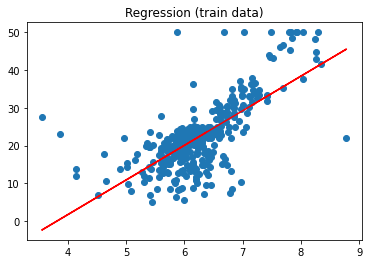

In [10]:
#Visualización en datos de entrenamieno
plt.scatter(X_train, Y_train)
plt.plot(X_train, model.predict(X_train), color='r')
plt.title('Regression (train data)')
plt.show()

### Evaluación de los datos


Finalmente, podemos ver cómo se comporta el error a través del dataset de entrenamiento y de evaluación. El error que nos interesa reportar (para determinar la capacidad de generalización de nuestro modelo) es el error de evaluación. Ya que estamos usando un modelo de regresión, podemos estimar el error cuadrático y el score $R^2$.

El error cuadrático medio se estima como:

$$MSE = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2$$

Donde $y_i$ son los valores de regresión reales, mientras que $\hat{y}_i$ son los valores predichos por el modelo. Por otra parte, el score $R^2$ se estima com:

$$R^2 = 1  - \frac{\sum_{i=1}^N (y_i - \hat{y}_i)^2}{\sum_{i=1}^N (y_i - \hat{y}_i)}$$

Recordemos que las métricas de evaluación se hacen sobre los datos de evaluación, no los de entrenamiento. Para evaluar, utilizamos las metricas disponibles en <tt>skleanr</tt>.

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

#Predicción sobre datos de evaluación
y_pred = model.predict(X_test)
#Obtención de métricas
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print('Error cuadrático medio: {}\nScore R2: {}'.format(mse,r2))

Error cuadrático medio: 46.59944644880899
Score R2: 0.4711660649432581


Podemos también visualizar qué tanto se ajusta la recta estimada a los datos de evaluación.

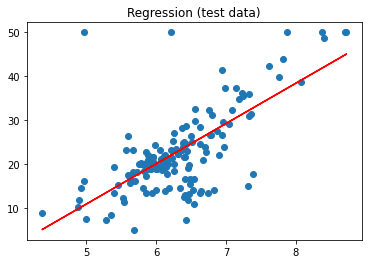

In [12]:
#Visualización en datos de evaluación
plt.scatter(X_test, Y_test)
plt.plot(X_test, model.predict(X_test), color='r')
plt.title('Regression (test data)')
plt.show()

## Regresión lineal multi-variable

En el caso anterior sólo hemos tomado la variable $RM$ como variable de entrada en la regresión (esto permite visualizar la regresión en un plano 2-dimensional). Pero la regresión lineal puede estimarse tomando en cuenta $d$ varibales de entrada. Así, podemos tomar las 13 variables de los datos y ver cuáles son las que muestran mayor influencia en la decisión del precio. En este caso, nuestra función de regresión es una función $f:\mathbb{R}^d \to \mathbb{R}$.

En realidad, no hay mayores cambios al modelo, pues este puede trabajar con entradas de diferentes dimensiones. Sólo que ahora los parámetros aprendidos serán 13 (o en general $d$) en lugar de sólo 1 (sin considerar el sesgo $b$). El procedimiento es el mismo. En primer lugar, separamos los datos en entrenamiento y evauluación.

In [13]:
#Separa los datos multi-dimensionales
X_train, X_test, Y_train, Y_test = train_test_split(data.data, Y, test_size=0.3)

print('Ejemplo de vector de entrada:\n{}'.format(X_train[0]))

Ejemplo de vector de entrada:
[  9.51363   0.       18.1       0.        0.713     6.728    94.1
   2.4961   24.      666.       20.2       6.68     18.71   ]


Podemos entonces pasar a crear el modelo y a entrenarlo con los datos de entrenamiento:

In [14]:
#Crea el modelo
model_multi = LinearRegression()
#Entrena el modelo
model_multi.fit(X_train, Y_train)

En este caso, los parámetros aprendidos están $w\in \mathbb{R}^d$. Los valores aprendidos para cada parámetro $w_i$ representan la relevancia que la variable correspondiente $X_i$ tiene para la predicción del valor. De hecho, se puede ver una relación con la correlación de Pearson, si bien no son iguales, ambas representan una relación lineal entre la variable de entrada y la variable de salida. 

In [15]:
print('Sesgo: {}'.format(model_multi.b))
pd.DataFrame(data=model_multi.w, index=data.feature_names, columns=['wi']).T

Sesgo: 36.132932135999


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
wi,-0.113531,0.067205,0.064406,3.143854,-16.400452,3.699868,-0.011999,-1.697171,0.337163,-0.013701,-0.861257,0.010114,-0.550689


Como era esperado, el valor positivo más grande corresponde a la variable $RM$, pues esta variable, como señalamaos más arriba, es la que muestra una mayor correlación lineal con la variable de salida $Y$. De las variables con mayor valor negativo tenemos $NOX$ (concentración de óxido nitroso), lo que indica que esta variable contribuye a disminuir la variable $Y$, es decir, contribuye a disminuir el precio de la casa.

En el caso multi-dimensional, lo que aprende la regresión lineal es un hiperplano (generalización de recta y plano) que pasa por los puntos. En más de dos dimensiones esto es dificil de visualizar, pues se requiere de un espación $d+1$ dimensional. Para 2 dimensiones podemos visualizar los datos en un espacio 3D.

Por ejemplo, si visualizamos las variables con los parámetros con el valor positivo más alto, podemos ver que los puntos tienden a estar en un hiperplano que se inclina hacia arriba cuando los valores de las dos variables crecen.

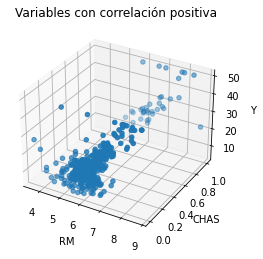

In [16]:
from mpl_toolkits.mplot3d import Axes3D

#Visualización de dos variables
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(table_data[['RM']].to_numpy(), table_data[['CHAS']].to_numpy(), Y)
plt.title('Variables con correlación positiva')
plt.xlabel('RM')
plt.ylabel('CHAS')
ax.set_zlabel('Y')
plt.show()

Por su parte, si visualizamos las variables que muestran un valor negativo alto; entonces los puntos recaen en un hiperplano que se inclina hacia abajo cuando los valores de las variables crecen.

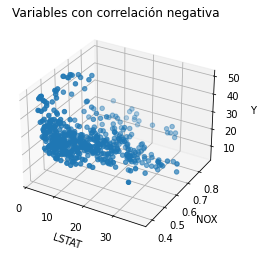

In [17]:
#Visualización de dos variables
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(table_data[['LSTAT']].to_numpy(), table_data[['NOX']].to_numpy(), Y)
plt.title('Variables con correlación negativa')
plt.xlabel('LSTAT')
plt.ylabel('NOX')
ax.set_zlabel('Y')
plt.show()

#### Evaluación

Finalmente, pasamos a evaluar el modelo de regresión lineal multi-dimensional usando las misma métricas que para el modelo uni-dimensional; esto es, usamos el error cuadrático medio y el score $R^2$.

In [18]:
#Predicción sobre datos de evaluación
y_pred = model_multi.predict(X_test)

#Métricas
MSE = mean_squared_error(Y_test, y_pred)
R2 = r2_score(Y_test, y_pred)

print('Error cuadrático: {}\nScore R2: {}'.format(MSE, R2))

Error cuadrático: 21.79321025009409
Score R2: 0.7126196758289889
